# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras`.
You should visit [`keras` webpage](https://keras.io/) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [3]:
input_layer = InputLayer(shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [5]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
x_train, x_test, y_train, y_test = prepare_boston()

In [9]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [10]:
input_layer = InputLayer(shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 0s - 24ms/step - loss: 0.1227
Epoch 2/10
5/5 - 0s - 4ms/step - loss: 0.1171
Epoch 3/10
5/5 - 0s - 3ms/step - loss: 0.1144
Epoch 4/10
5/5 - 0s - 3ms/step - loss: 0.1131
Epoch 5/10
5/5 - 0s - 3ms/step - loss: 0.1117
Epoch 6/10
5/5 - 0s - 3ms/step - loss: 0.1107
Epoch 7/10
5/5 - 0s - 3ms/step - loss: 0.1100
Epoch 8/10
5/5 - 0s - 3ms/step - loss: 0.1089
Epoch 9/10
5/5 - 0s - 3ms/step - loss: 0.1081
Epoch 10/10
5/5 - 0s - 3ms/step - loss: 0.1073


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [11]:
x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - 6ms/step - accuracy: 0.8397 - loss: 0.6379
Epoch 2/10
600/600 - 4s - 6ms/step - accuracy: 0.9054 - loss: 0.3492
Epoch 3/10
600/600 - 4s - 6ms/step - accuracy: 0.9137 - loss: 0.3114
Epoch 4/10
600/600 - 4s - 6ms/step - accuracy: 0.9184 - loss: 0.2934
Epoch 5/10
600/600 - 3s - 6ms/step - accuracy: 0.9214 - loss: 0.2825
Epoch 6/10
600/600 - 3s - 6ms/step - accuracy: 0.9235 - loss: 0.2753
Epoch 7/10
600/600 - 3s - 6ms/step - accuracy: 0.9244 - loss: 0.2698
Epoch 8/10
600/600 - 3s - 6ms/step - accuracy: 0.9260 - loss: 0.2656
Epoch 9/10
600/600 - 3s - 6ms/step - accuracy: 0.9274 - loss: 0.2622
Epoch 10/10
600/600 - 3s - 6ms/step - accuracy: 0.9281 - loss: 0.2588


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [12]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9084 - loss: 0.3310
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9566 - loss: 0.1511
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9692 - loss: 0.1069
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9761 - loss: 0.0819
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9814 - loss: 0.0656
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9842 - loss: 0.0542
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9869 - loss: 0.0444
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9891 - loss: 0.0375
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9912 - loss: 0.0313
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9924 - loss: 0.0267


In [13]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9143 - loss: 0.2998
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9639 - loss: 0.1189
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9758 - loss: 0.0810
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9815 - loss: 0.0593
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9851 - loss: 0.0475
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9884 - loss: 0.0374
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9908 - loss: 0.0291
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9926 - loss: 0.0240
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9937 - loss: 0.0200
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9944 - loss: 0.0170


In [14]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9155 - loss: 0.2858
Epoch 2/10
600/600 - 5s - 9ms/step - accuracy: 0.9660 - loss: 0.1131
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9761 - loss: 0.0782
Epoch 4/10
600/600 - 5s - 9ms/step - accuracy: 0.9814 - loss: 0.0575
Epoch 5/10
600/600 - 5s - 9ms/step - accuracy: 0.9855 - loss: 0.0449
Epoch 6/10
600/600 - 5s - 9ms/step - accuracy: 0.9867 - loss: 0.0404
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9902 - loss: 0.0295
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9911 - loss: 0.0282
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9925 - loss: 0.0219
Epoch 10/10
600/600 - 5s - 9ms/step - accuracy: 0.9915 - loss: 0.0245


In [15]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,384 (1.54 MB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,590 (1.03 MB)

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [16]:
units = 134794 / 794

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9113 - loss: 0.3163
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9589 - loss: 0.1411
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9716 - loss: 0.0988
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9780 - loss: 0.0748
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9824 - loss: 0.0590
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9863 - loss: 0.0474
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9893 - loss: 0.0378
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9915 - loss: 0.0312
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9929 - loss: 0.0255
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9944 - loss: 0.0204


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [17]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
420/420 - 4s - 11ms/step - accuracy: 0.9013 - loss: 0.3322 - val_accuracy: 0.9542 - val_loss: 0.1566
Epoch 2/10
420/420 - 4s - 11ms/step - accuracy: 0.9640 - loss: 0.1183 - val_accuracy: 0.9601 - val_loss: 0.1314
Epoch 3/10
420/420 - 4s - 11ms/step - accuracy: 0.9753 - loss: 0.0795 - val_accuracy: 0.9695 - val_loss: 0.1060
Epoch 4/10
420/420 - 5s - 11ms/step - accuracy: 0.9818 - loss: 0.0597 - val_accuracy: 0.9727 - val_loss: 0.0956
Epoch 5/10
420/420 - 5s - 11ms/step - accuracy: 0.9851 - loss: 0.0456 - val_accuracy: 0.9683 - val_loss: 0.1138
Epoch 6/10
420/420 - 5s - 11ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.9709 - val_loss: 0.1072
Epoch 7/10
420/420 - 5s - 11ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9725 - val_loss: 0.1077
Epoch 8/10
420/420 - 4s - 11ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9711 - val_loss: 0.1228
Epoch 9/10
420/420 - 4s - 11ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9704 - val_loss:

In [18]:
units = 134794 / 794

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
420/420 - 4s - 9ms/step - accuracy: 0.8962 - loss: 0.3708 - val_accuracy: 0.9407 - val_loss: 0.2100
Epoch 2/10
420/420 - 4s - 9ms/step - accuracy: 0.9529 - loss: 0.1671 - val_accuracy: 0.9568 - val_loss: 0.1529
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9661 - loss: 0.1171 - val_accuracy: 0.9613 - val_loss: 0.1326
Epoch 4/10
420/420 - 4s - 9ms/step - accuracy: 0.9747 - loss: 0.0887 - val_accuracy: 0.9667 - val_loss: 0.1159
Epoch 5/10
420/420 - 4s - 9ms/step - accuracy: 0.9802 - loss: 0.0693 - val_accuracy: 0.9677 - val_loss: 0.1100
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9840 - loss: 0.0548 - val_accuracy: 0.9689 - val_loss: 0.1068
Epoch 7/10
420/420 - 4s - 9ms/step - accuracy: 0.9873 - loss: 0.0450 - val_accuracy: 0.9702 - val_loss: 0.1008
Epoch 8/10
420/420 - 4s - 9ms/step - accuracy: 0.9901 - loss: 0.0370 - val_accuracy: 0.9726 - val_loss: 0.0973
Epoch 9/10
420/420 - 4s - 9ms/step - accuracy: 0.9924 - loss: 0.0302 - val_accuracy: 0.9735 - val_loss:

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [19]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.9023 - loss: 0.3430 - val_accuracy: 0.9507 - val_loss: 0.1742
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9590 - loss: 0.1394 - val_accuracy: 0.9602 - val_loss: 0.1321
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9720 - loss: 0.0944 - val_accuracy: 0.9649 - val_loss: 0.1165
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9785 - loss: 0.0707 - val_accuracy: 0.9663 - val_loss: 0.1124
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9705 - val_loss: 0.1016
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9875 - loss: 0.0407 - val_accuracy: 0.9722 - val_loss: 0.1012
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9714 - val_loss: 0.1028
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9928 - loss: 0.0261 - val_accuracy: 0.9696 - val_loss: 0.1120
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9716 - val_loss:

In [20]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


420/420 - 3s - 7ms/step - accuracy: 0.6975 - loss: 1.2770 - val_accuracy: 0.8488 - val_loss: 0.6359
Epoch 2/10
420/420 - 3s - 7ms/step - accuracy: 0.8635 - loss: 0.5282 - val_accuracy: 0.8832 - val_loss: 0.4336
Epoch 3/10
420/420 - 3s - 7ms/step - accuracy: 0.8864 - loss: 0.4106 - val_accuracy: 0.8957 - val_loss: 0.3700
Epoch 4/10
420/420 - 3s - 7ms/step - accuracy: 0.8987 - loss: 0.3620 - val_accuracy: 0.9038 - val_loss: 0.3372
Epoch 5/10
420/420 - 3s - 7ms/step - accuracy: 0.9058 - loss: 0.3321 - val_accuracy: 0.9103 - val_loss: 0.3155
Epoch 6/10
420/420 - 3s - 7ms/step - accuracy: 0.9117 - loss: 0.3109 - val_accuracy: 0.9143 - val_loss: 0.2984
Epoch 7/10
420/420 - 3s - 7ms/step - accuracy: 0.9158 - loss: 0.2936 - val_accuracy: 0.9174 - val_loss: 0.2864
Epoch 8/10
420/420 - 3s - 8ms/step - accuracy: 0.9190 - loss: 0.2792 - val_accuracy: 0.9220 - val_loss: 0.2746
Epoch 9/10
420/420 - 3s - 7ms/step - accuracy: 0.9229 - loss: 0.2665 - val_accuracy: 0.9248 - val_loss: 0.2637
Epoch 10/10


In [21]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.9005 - loss: 0.3495 - val_accuracy: 0.9479 - val_loss: 0.1808
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9584 - loss: 0.1398 - val_accuracy: 0.9583 - val_loss: 0.1364
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9715 - loss: 0.0956 - val_accuracy: 0.9659 - val_loss: 0.1160
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9788 - loss: 0.0707 - val_accuracy: 0.9699 - val_loss: 0.1004
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9844 - loss: 0.0520 - val_accuracy: 0.9688 - val_loss: 0.1062
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9878 - loss: 0.0408 - val_accuracy: 0.9686 - val_loss: 0.1053
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9712 - val_loss: 0.0967
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9724 - val_loss: 0.1027
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9728 - val_loss:

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [22]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.7534 - loss: 1.0075 - val_accuracy: 0.8933 - val_loss: 0.4112
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9062 - loss: 0.3494 - val_accuracy: 0.9173 - val_loss: 0.2970
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9233 - loss: 0.2751 - val_accuracy: 0.9281 - val_loss: 0.2551
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9330 - loss: 0.2378 - val_accuracy: 0.9351 - val_loss: 0.2310
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9404 - loss: 0.2118 - val_accuracy: 0.9396 - val_loss: 0.2125
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9459 - loss: 0.1918 - val_accuracy: 0.9431 - val_loss: 0.2001
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9500 - loss: 0.1754 - val_accuracy: 0.9484 - val_loss: 0.1866
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9540 - loss: 0.1614 - val_accuracy: 0.9481 - val_loss: 0.1795
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9575 - loss: 0.1497 - val_accuracy: 0.9510 - val_loss:

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [23]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.9012 - loss: 0.3526 - val_accuracy: 0.9434 - val_loss: 0.1919
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9596 - loss: 0.1376 - val_accuracy: 0.9582 - val_loss: 0.1371
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9727 - loss: 0.0920 - val_accuracy: 0.9659 - val_loss: 0.1137
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9793 - loss: 0.0691 - val_accuracy: 0.9687 - val_loss: 0.1057
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9849 - loss: 0.0507 - val_accuracy: 0.9690 - val_loss: 0.1073
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9886 - loss: 0.0391 - val_accuracy: 0.9687 - val_loss: 0.1095
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9898 - loss: 0.0326 - val_accuracy: 0.9713 - val_loss: 0.1080
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9916 - loss: 0.0270 - val_accuracy: 0.9724 - val_loss: 0.1088
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9688 - val_loss:

In [24]:
h.history

{'accuracy': [0.9011666774749756,
  0.9595714211463928,
  0.9726666808128357,
  0.9792618751525879,
  0.9848571419715881,
  0.9885714054107666,
  0.989809513092041,
  0.9916428327560425,
  0.9934285879135132,
  0.9946666955947876],
 'loss': [0.3525865077972412,
  0.13758544623851776,
  0.09204570949077606,
  0.06905577331781387,
  0.05067828670144081,
  0.039093196392059326,
  0.03258202597498894,
  0.026970528066158295,
  0.021528108045458794,
  0.01750633865594864],
 'val_accuracy': [0.9433888792991638,
  0.9582222104072571,
  0.9659444689750671,
  0.968666672706604,
  0.968999981880188,
  0.968666672706604,
  0.9712777733802795,
  0.9724444150924683,
  0.968833327293396,
  0.9703333377838135],
 'val_loss': [0.19193238019943237,
  0.1370515525341034,
  0.11369127780199051,
  0.10566958785057068,
  0.1073310524225235,
  0.10950298607349396,
  0.10802976787090302,
  0.10879310965538025,
  0.12017141282558441,
  0.11402251571416855]}

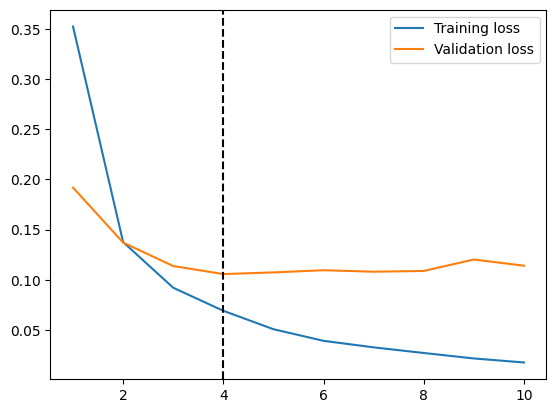

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.keras` on your project. Only record models if validation loss is lower than for all previous models.

In [26]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.keras", save_best_only=True)

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10
600/600 - 17s - 29ms/step - accuracy: 0.9136 - loss: 0.2995 - val_accuracy: 0.9578 - val_loss: 0.1443
Epoch 2/10
600/600 - 6s - 9ms/step - accuracy: 0.9650 - loss: 0.1182 - val_accuracy: 0.9701 - val_loss: 0.1019
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9762 - loss: 0.0809 - val_accuracy: 0.9737 - val_loss: 0.0851
Epoch 4/10
600/600 - 5s - 9ms/step - accuracy: 0.9812 - loss: 0.0604 - val_accuracy: 0.9754 - val_loss: 0.0814
Epoch 5/10
600/600 - 5s - 9ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9776 - val_loss: 0.0792
Epoch 6/10
600/600 - 6s - 9ms/step - accuracy: 0.9875 - loss: 0.0388 - val_accuracy: 0.9769 - val_loss: 0.0777
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9903 - loss: 0.0306 - val_accuracy: 0.9766 - val_loss: 0.0782
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9787 - val_loss: 0.0725
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.9763 - val_loss: 0.0830

Use the code below to check that a model has been saved:

In [27]:
%ls -alh "model.keras"

-rw-r--r--@ 1 rtavenar  staff   1.4M Sep  9 17:19 model.keras


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.0997


[0.08239037543535233, 0.9781000018119812]

In [29]:
model.load_weights("model.keras")
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.0901


[0.0724618062376976, 0.9786999821662903]

## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://keras.io/api/layers/regularizers/) could help.

In [30]:
from keras.regularizers import l2

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=y_train.shape[1], activation="softmax", kernel_regularizer=l2(.001))
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 5s - 11ms/step - accuracy: 0.9021 - loss: 0.5851 - val_accuracy: 0.9470 - val_loss: 0.3861
Epoch 2/10
480/480 - 5s - 10ms/step - accuracy: 0.9520 - loss: 0.3500 - val_accuracy: 0.9579 - val_loss: 0.3143
Epoch 3/10
480/480 - 5s - 10ms/step - accuracy: 0.9631 - loss: 0.2918 - val_accuracy: 0.9663 - val_loss: 0.2784
Epoch 4/10
480/480 - 5s - 10ms/step - accuracy: 0.9676 - loss: 0.2637 - val_accuracy: 0.9687 - val_loss: 0.2567
Epoch 5/10
480/480 - 5s - 10ms/step - accuracy: 0.9702 - loss: 0.2454 - val_accuracy: 0.9664 - val_loss: 0.2580
Epoch 6/10
480/480 - 5s - 10ms/step - accuracy: 0.9715 - loss: 0.2366 - val_accuracy: 0.9675 - val_loss: 0.2477
Epoch 7/10
480/480 - 5s - 10ms/step - accuracy: 0.9747 - loss: 0.2276 - val_accuracy: 0.9707 - val_loss: 0.2355
Epoch 8/10
480/480 - 5s - 10ms/step - accuracy: 0.9747 - loss: 0.2240 - val_accuracy: 0.9718 - val_loss: 0.2292
Epoch 9/10
480/480 - 5s - 10ms/step - accuracy: 0.9757 - loss: 0.2201 - val_accuracy: 0.9709 - val_loss:

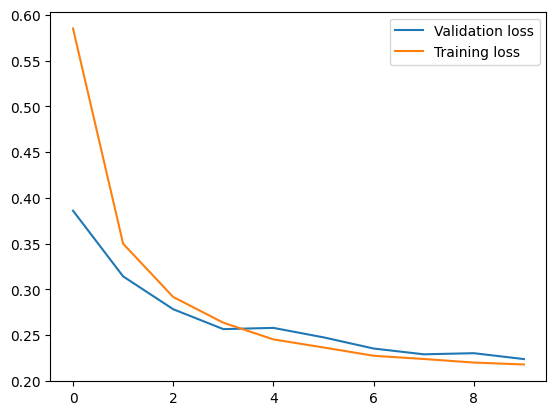

In [31]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://keras.io/api/layers/regularization_layers/dropout/) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [32]:
from keras.layers import Dropout

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 4s - 9ms/step - accuracy: 0.8757 - loss: 0.4114 - val_accuracy: 0.9532 - val_loss: 0.1673
Epoch 2/10
480/480 - 4s - 9ms/step - accuracy: 0.9451 - loss: 0.1818 - val_accuracy: 0.9607 - val_loss: 0.1302
Epoch 3/10
480/480 - 4s - 9ms/step - accuracy: 0.9588 - loss: 0.1354 - val_accuracy: 0.9697 - val_loss: 0.1002
Epoch 4/10
480/480 - 4s - 9ms/step - accuracy: 0.9677 - loss: 0.1072 - val_accuracy: 0.9721 - val_loss: 0.0899
Epoch 5/10
480/480 - 4s - 9ms/step - accuracy: 0.9711 - loss: 0.0921 - val_accuracy: 0.9741 - val_loss: 0.0853
Epoch 6/10
480/480 - 4s - 9ms/step - accuracy: 0.9755 - loss: 0.0785 - val_accuracy: 0.9767 - val_loss: 0.0802
Epoch 7/10
480/480 - 4s - 9ms/step - accuracy: 0.9769 - loss: 0.0723 - val_accuracy: 0.9774 - val_loss: 0.0760
Epoch 8/10
480/480 - 4s - 9ms/step - accuracy: 0.9792 - loss: 0.0651 - val_accuracy: 0.9789 - val_loss: 0.0761
Epoch 9/10
480/480 - 4s - 9ms/step - accuracy: 0.9813 - loss: 0.0572 - val_accuracy: 0.9768 - val_loss: 0.0790
E

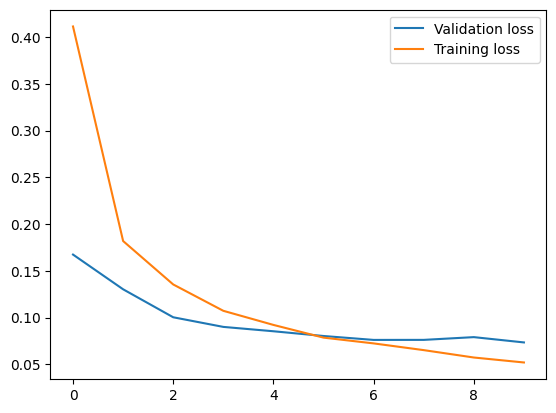

In [33]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #13.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [34]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 5s - 9ms/step - accuracy: 0.9167 - loss: 0.2953 - val_accuracy: 0.9585 - val_loss: 0.1363
Epoch 2/100
600/600 - 5s - 9ms/step - accuracy: 0.9656 - loss: 0.1154 - val_accuracy: 0.9697 - val_loss: 0.1005
Epoch 3/100
600/600 - 5s - 9ms/step - accuracy: 0.9769 - loss: 0.0766 - val_accuracy: 0.9710 - val_loss: 0.0962
Epoch 4/100
600/600 - 5s - 9ms/step - accuracy: 0.9828 - loss: 0.0565 - val_accuracy: 0.9727 - val_loss: 0.0849
Epoch 5/100
600/600 - 5s - 9ms/step - accuracy: 0.9861 - loss: 0.0440 - val_accuracy: 0.9693 - val_loss: 0.1008
Epoch 6/100
600/600 - 5s - 9ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9772 - val_loss: 0.0765
Epoch 7/100
600/600 - 5s - 9ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9775 - val_loss: 0.0764
Epoch 8/100
600/600 - 5s - 9ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9779 - val_loss: 0.0766
Epoch 9/100
600/600 - 5s - 9ms/step - accuracy: 0.9932 - loss: 0.0197 - val_accuracy: 0.9785 - val_loss:

In [35]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9723 - loss: 0.0945


[0.0752396211028099, 0.9785000085830688]